# PUI2015 FINAL EXAM

## This exam is take home. Deliver your solution as an ipython notebook, uploading it to NYUclasses BY TUESDAY 12/22/2016 at 11:59:59 PM 

## work alone. If you have questions, feel free to ask your instructors and TAs. High level intellectual discussion is never forbidden, so general, conceptual questions can be discussed with your classmates, but do not exchange code, or algorithms (specific solution design).

example of a fair question: Do you think clustering if all my variables are spatial requires whitening?

example of an unfair question: did you divide the longitude by its mean or subtract it?



# Goal: evaluate the relevance of different factors in causing asthma in NYC. 


## Motivation: 
Several environmental variables affect respiratory health. The health department finds correlation between asthma cases and a number of geographical factors, including:
proximity to highways, proximity to green spaces, criminality rate (murder rate specifically). Additionally environmental factors such as construction releasing air pollutants, unsanitary conditions, etc., may trigger respiratory problems.
In this work you will attempt to valuate the importance of these factors.


## Method: 

work on the ZIP code level.

1) __Identify the 5 facilities__ that reported the highest incidence of asthma cases and find which ZIP code they fall in.

2) __Develop a Metric__ for each of the fllowing: access to green space, murder rate, environmental health, and proximity to highways for each ZIP code (no panic, suggestions on how to proceed are in the hints file). You must choose AT LEAST 2 variables among these 4. We encourage you to work with three. Choosing 4 or more, and coming up with additional ones, is considered extra credit.

3) __Show a table__ containing the value of each variable of interest for the 5 ZIP codes corresponding to the highest cases of Asthma.

4) __Display__ each of your metrics as a choropleth (a heatmap version of a geographical map where each zip code is a different color based on the value of the metric you are mapping).

5) __Fit__ a model  (try a multivariable linear model for example or any other model which you think may be reasonable, keeping in mind you will need to use the model in the last task) to the incidence of asthma cases per NYC ZIP code (this is your dependent variable) as a function of variables mentioned above, based on the ZIP codes of the top 5 facilities reporing asthma. 

6) __Cluster__ the ZIP codes using the model you generated in step 4 as a distance metric (suggestions if needed are in the hints file).

7) __Discuss__. What did you find? What is the spatial coherence of the different factors considered, which variables seem to be more important in triggering asthma cases, what are the weaknesses of the model, how does the clustering look. 




# DATA: 
## the data is described in the PUI2015_DATA.ipynb markdown

# HINTS:
## The first hint is to READ THROUGH ALL OF THE INSTRUCTIONS. There are several tasks, but don't get overwhelmed:  these are all things you have done before, and for which you have examples in the codes from the lecture and in the homework!

## Get all the data you will need before you go into data munging.

## Complete the mimum requirements first. Then go back and work on optional requirements, and continue improving your work as much as you can from there, in a modular way (so you know you have the minimum by the deadline at least!)

## Several more detailed hints are given in the PUI2015_HINTS.ipynb markdown

# RULES:
## rules are spelled out in the PUI2015_RULES.ipynb markdown    
## Don't cheat. Cheating will be punished with at least failing the class, and reported to the educational team for consideration of more significant action.


<h1> Task 1: Querying Asthma Discharges </h1>

In this first task, you are asked to retrieve the top 5 facility IDs that had the highest count of asthma treatments in 2013. We can assume that any case that is diagnosed as an Asthma treatment should have the word "*asthma*" (case-insensitive) in the **ccs_diagnosis_description** of the **nyc_discharge_2013**. This must be done through a SQL command.
In the data section we define a helper function <b>queryCartoDB</b> to wrap around the SQL API of CartoDB. We can simply pass in a public data source (in the form of 'https://{ACCOUNT}.cartodb.com/api/v2/sql', where ACCOUNT is the owner of the data) and a SQL statement for us to query the data in various formats including CSV, JSON, and GeoJSON. There will be three data sources (with table name in parentheses) to be queried from the CartoDB databases: so that you can get data for the New York City Hospital Inpatient 2013 Discharge, Health Facility Information, Highway streets per zip code.

Examples and bits of code you can use are provided in the PUI2015_DATA.ipynb (you can copy an paste code from there into this notebook)

After retrieveing those 5 IDs, please cross-reference them with the IDs listed in the **nyc_facility** table (this could be done with SQL or offline with GeoPandas using the **facilities** variable above). Then provide us with the following:

<ol>
<li>The list of the top 5 facilities by their facility names (aka. the **facility_name** column)</li>
<li>A map of those 5 facilities in the NAD 83 / New York Long Island (EPSG:2263) coordiantes.</li>


<h1> Task 2: Geo-referencing the facilities with the zip code highway profile</h1>

In this task, you are to asked to find out which zip code the top 5 facilities found in Task 1 belong to, and how many miles of highway streets are within its proximity. To determine which zip code a facility belongs to, you can either use SQL or GeoPandas. Your results have to be 

<ol>
<li>a list of 5 facilities (like in Task 1.1) but with two additional columns: the ZIP code and the total highway miles belonging to that zip code.</li>
<li> a map (cloropleth) of highway length for all NYC ZIP codes.
</li>

<h1> Of the following 3 tasks (3-5) you must complete at least one, whichever one you prefer, so that you have at least 2 variables for your regressoin (complete one of tasks 3-5 and move to tasks 6 and 7, which are mandatory). However we recommand you then go back, once you are sure you can complete the exercise, and complete more tasks to create a more sophisticated model.</h1>


<h1>TASK 3:</h1>
    
   Murder rate: find the murder rate per precinct in NYC and the precinct geographical location (see PUI2015_DATA.ipynb). Design an appropriate metric that describes the exposure to violent crimes (specifically murder) per ZIP code. This should take into account the murder rate as well as the distance to the precint where the murder occurred (suggestions on how to build the metric are in the hints file).
   Your results should be: 
    
   <ol>
    <li>a dataframe like the one derived in TASK 2 but with an additional column: the exposure to violent crimes in the ZIP code of the 5 identified facilities.</li>
    <li> choropleth of the murder rate  for all ZIP codes in NYC</li>
    
 
    

# TASK 4:
   Access to green space: find all information about size and location of NYC parks (see PUI2015_DATA.ipynb). Design an appropriate metric that describes the access to green spaces per zip code. This should take into account the size of nearby parks as well as the distance to them. Suggestions are given to you in the hints file.
   Your results should be: 
   <ol>
    <li> a dataframe like the one derived in TASK 3 but with an additional column: the access to park for the zip codes of the 5 identified facilities.</li>
    <li> choropleth of your 'access to green spaces metric' per for all ZIP codes in NYC</li>

    
 
 

# TASK 5:
   Environmental conditions: find the 311 data (see PUI2015_DATA.ipynb). Where and how to select it is described in the Data section and in the hints we give recommendations on how to preprocess the data. Use the 'normalized 311' data (see hints) and return: 
   <ol>
   <li> a dataframe like the one derived in TASK 4 but with an additional column containing this information</li>
   <li> make a choropleth of the normalized 311 calls relevant to environmental conditions per for all ZIP codes in NYC </li> 
    

# TASK 6:
  create a regression model for the 5 zip codes that includes at least 2 of the variables (fewer than 2 will not allow a passing grade): 
  highway length in the zip code, exposure to violent crimes in that zip code, 
  access to green spaces in that zip code, 311-normalized calls in that zip code. 
        
  Report the statistics for your model and assess how well it describes the dependent variable.
    

# TASK 7:
   Use the elements of this model to cluster NYC zip codes by asthma risk. Your distance metric cna be bilt on the result of the regression. See Hints file if you need help on this task
   
   The result will be a map of the clusters.

below is an example of a map derived by clustering from a model as the one you are required to make. This is just an example though: remember that  your model will be different, so the map will be different!)

(900000.0, 1080000.0, 120000.0, 280000.0)

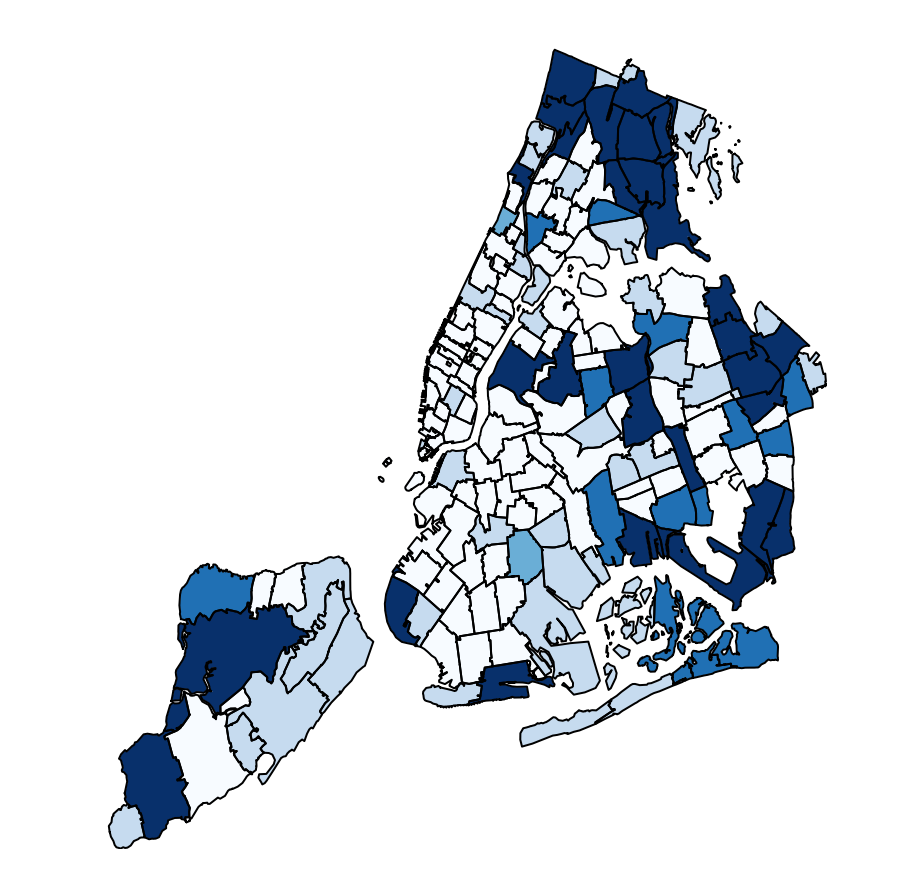

## DISCUSS 
discuss the work you did, describe your result. Label and caption your plots. 
Highlight the weaknesses of the project and describe possible improvements. 

## EXTRA CREDIT:
you can include more variables and create a more sophisticated model for asthma risk in NYC. You can also validate your model using the discharge information form the data you downloaded earlier for other facilities.

# GOOD LUCK! 